In [195]:
# Long short simulator, copyright Taeyoon Lee, Dept of AI Product Development, NHIS
# Sept 2016, version 1.1 
# version note : V1.1 -- added LS investment return graph and percentile representation

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from pandas.io.data import DataReader
import numpy as np
%matplotlib inline

In [197]:
end = datetime.datetime.now()

In [198]:
start = datetime.datetime(year=end.year-1, month=end.month, day=end.day) # -1 in year affirms a year ago...

In [199]:
stock_list = ['VFH', 'XLU'] # long first / short second:::::::::::::::: user INPUT

In [200]:
closing_price = DataReader(stock_list, 'yahoo', start, end)['Adj Close'] # fetch stock data from Yahoo Finance

In [201]:
closing_price = pd.DataFrame(closing_price, columns=stock_list) # place long stock first in the DF anytime.... 

In [202]:
closing_return = closing_price.pct_change().dropna()

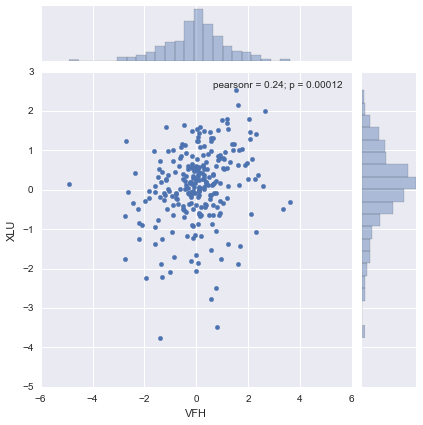

In [203]:
sns.jointplot(closing_return.ix[:,0]*100, closing_return.ix[:,1]*100) # long: X axis, short: Y axis

C:\Users\woori\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


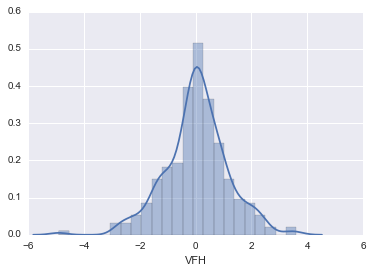

In [204]:
sns.distplot(closing_return.ix[:,0]*100) # long histogram and KDE plot

C:\Users\woori\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


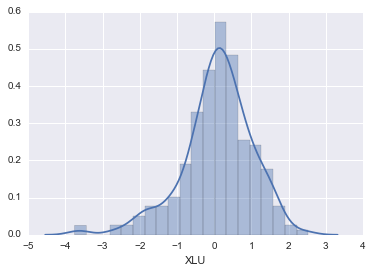

In [205]:
sns.distplot(closing_return.ix[:,1]*100) # short histogram and KDE plot

In [206]:
closing_return['INV SPREAD']=(((1+closing_return).cumprod()-1).ix[:,0]-((1+closing_return).cumprod()-1).ix[:,1])/2.0
# calculating LS investment return and making INV SPREAD column

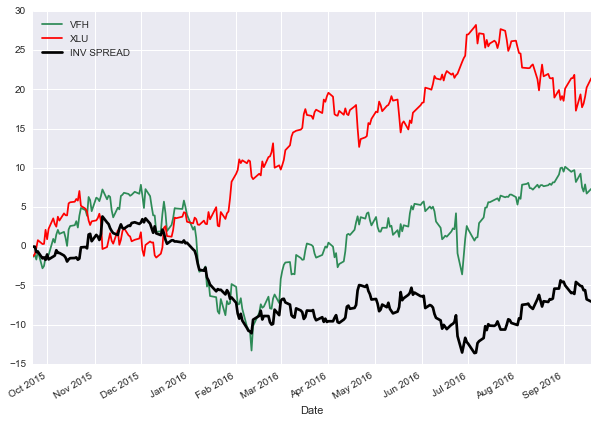

In [207]:
(((1+closing_return.ix[:,0]).cumprod()-1)*100).plot(legend=True, figsize=(10,7), color='seagreen') # long plot - green
(((1+closing_return.ix[:,1]).cumprod()-1)*100).plot(legend=True, figsize=(10,7), color='r') # short plot - red
(closing_return['INV SPREAD']*100).plot(legend=True, figsize=(10,7), color='k', linewidth=2.7) 
# multiply by 100 to make percentile representation

In [208]:
(((1+closing_return).cumprod()-1).ix[-1,0:2]*100)  # final return in the order of long and short, percent term

VFH     7.331151
XLU    21.443111
Name: 2016-09-19 00:00:00, dtype: float64

In [209]:
(closing_return['INV SPREAD'].ix[-1,2]*100) # LS investment return(%)

-7.0559801575146412

In [210]:
(closing_return['INV SPREAD']*100).mean() # percent term, mean

-5.426882687576105

In [211]:
(closing_return['INV SPREAD']*100).std() # percent term, standard deviation

4.488453003977231

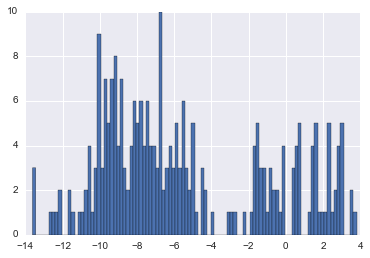

In [212]:
(closing_return['INV SPREAD']*100).hist(bins=100) # x axis -- percent term